# Introducing the New CyberGISX Python 3 0.9.4 Kernel

**Authors:** Alex Michels

**Last Updated:** July 25th, 2023

This notebook introduces the brand new Python 3-0.9.4 Kernel!

## Summary:

* **Tag notebooks that rely on the "Python 3" kernel.** The unversioned "Python 3" kernel will be updated to use the latest 0.9.4 kernel on release. Please save the notebooks with the "Python 3-0.9.0" kernel if you would like to preserve current behavior. Due to updated package versions and new packages, we cannot guaranttee that all notebooks that work with the "Python 3-0.9.0" kernel will work with the Python 3-0.9.4 kernel.
* **Python 3-0.9.4 has updated and new packages.** The kernel has lots of updates and new packages like census, gtfspy, and pyrosm!
* **Java now loaded in Python 3 0.9.4 Kernel.** The "Python 3-0.9.4" kernel now uses our new `cybergisx-0.9.0` metamodule which loads Java into the environment. This was required for a variety of packages.

### Tag notebooks that rely on the "Python 3" kernel.

The unversioned "Python 3" kernel will be updated to use the latest 0.9.4 kernel on release. This is done so that our "Python 3" kernel is always using our latest version. We feel this is important so that new users can jump right in and not get confused with our versioned kernel system. By the "unversioned" Python 3 kernel, we are referring to the kernel in the image below:

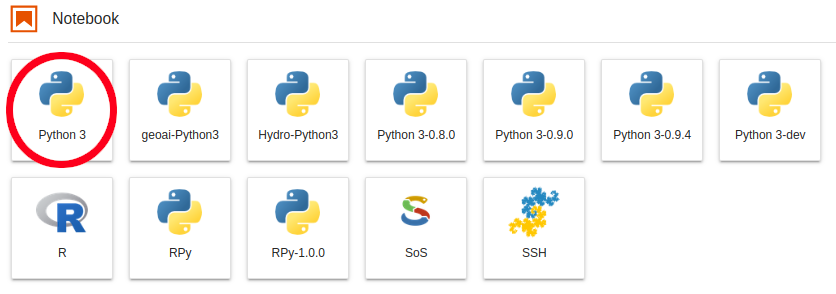

Please save the notebooks with the "Python 3-0.9.0" kernel if you would like to preserve current behavior. You can tell which kernel a notebook is using by checking the top-right corner. Notebooks using the Python 3 kernel will look like:

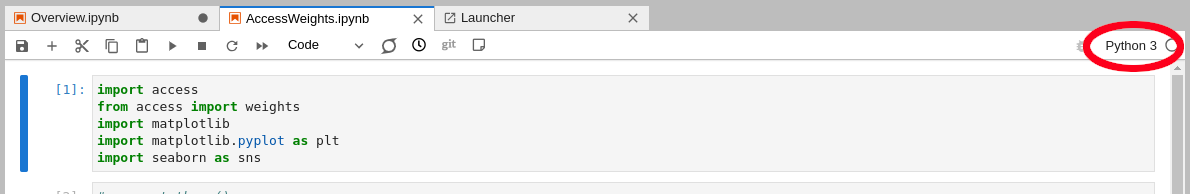

To change the notebook to use the "Python 3-0.9.0" kernel, simply click the kernel name in the top-right (the area circled in the image above) to bring up a "Select Kernel" dropdown menu. Then, select "Python3-0.9.0" and save the notebook.

Due to updated package versions and new packages, we cannot guaranttee that all notebooks that work with the "Python 3-0.9.0" will work with the "Python 3-0.9.4" kernel. There are a variety of updated and new packages which we will discuss further in the next section, so some code may work with both kernels and other code may not.

## Python 3-0.9.4 has updated and new packages

The Python 3-0.9.4 kernel has a variety of new and updated packages! A few of the new packages:

* census
* googlemaps
* gtfspy
* movingpandas
* plotnine
* r5py
* spatial_access
* urbanpy

A few of the notable updates/upgrades are:

* geopandas 0.10.2 -> 0.13.2
* osmnx 1.1.2 -> 1.2.2
* pandas 1.3.5-> 2.0.3
* scikit-learn 1.0.2 -> 1.2.2


For a full read-out of the kernel we can use conda:

In [1]:
!conda list -p /cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4

# packages in environment at /cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
_tflow_select             2.3.0                       mkl    defaults
abseil-cpp                20210324.2           h9c3ff4c_0    conda-forge
absl-py                   1.4.0              pyhd8ed1ab_0    conda-forge
access                    1.1.9                    pypi_0    pypi
affine                    2.4.0              pyhd8ed1ab_0    conda-forge
aiobotocore               2.5.0              pyhd8ed1ab_0    conda-forge
aiohttp                   3.8.4            py38h01eb140_1    conda-forge
aioitertools              0.11.0             pyhd8ed1ab_0    conda-forge
aiosignal                 1.3.1              pyhd8ed1ab_0    conda-forge
alsa-lib                  1.2.3.2       

Let's briefly splotlight two new packages: `us` and `urbanpy`!

#### **us**

The `us` package is very useful for quickly retrieving data our US states and territories. [For more information check out their README](https://github.com/unitedstates/python-us). For example, we can easily loop through the states and their FIPS codes:

In [2]:
import us

for state in us.states.STATES:
    print(state, state.fips)

Alabama 01
Alaska 02
Arizona 04
Arkansas 05
California 06
Colorado 08
Connecticut 09
Delaware 10
Florida 12
Georgia 13
Hawaii 15
Idaho 16
Illinois 17
Indiana 18
Iowa 19
Kansas 20
Kentucky 21
Louisiana 22
Maine 23
Maryland 24
Massachusetts 25
Michigan 26
Minnesota 27
Mississippi 28
Missouri 29
Montana 30
Nebraska 31
Nevada 32
New Hampshire 33
New Jersey 34
New Mexico 35
New York 36
North Carolina 37
North Dakota 38
Ohio 39
Oklahoma 40
Oregon 41
Pennsylvania 42
Rhode Island 44
South Carolina 45
South Dakota 46
Tennessee 47
Texas 48
Utah 49
Vermont 50
Virginia 51
Washington 53
West Virginia 54
Wisconsin 55
Wyoming 56


The package can also easily grab shapefiles for us. Let's use `us` to get the URL to Illinois counties and then plot that data with geopandas:

In [3]:
us.states.IL.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_17_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_17_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_17_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_17_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_17_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_17_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_17_bg10.zip'}

In [4]:
import geopandas as gpd

url_dict = us.states.IL.shapefile_urls()
url = url_dict['county']
gdf = gpd.read_file(url)
gdf.explore()

#### **urbanpy**

`urbanpy` has similar functionalities [and more](https://github.com/EL-BID/urbanpy), but is designed around cities:

<Axes: >

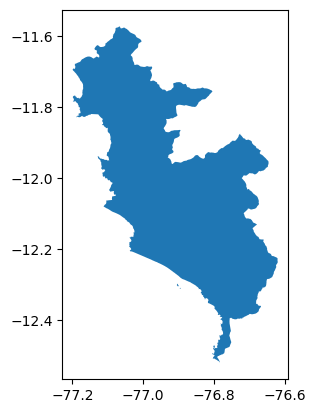

In [5]:
import urbanpy as up

boundaries = up.download.nominatim_osm('Lima, Peru', expected_position=2)
boundaries.plot()

## Java now loaded in Python 3 0.9.4 Kernel

A handful of the new packages required Java, so the new kernel uses the new `cybergis/0.9.0` metamodule which loads Java 11! You can check out the loaded modules by loading the module command and running module list:

In [6]:
import sys, os
sys.path.insert(0, os.path.join(os.environ['MODULESHOME'], "init"))
from env_modules_python import module

In [7]:
module("list")


Currently Loaded Modules:
  1) GCCcore/8.3.0                      44) x265/3.2-GCCcore-8.3.0
  2) zlib/1.2.11-GCCcore-8.3.0          45) util-linux/2.34-GCCcore-8.3.0
  3) binutils/2.32-GCCcore-8.3.0        46) fontconfig/2.13.1-GCCcore-8.3.0
  4) GCC/8.3.0                          47) xorg-macros/1.19.2-GCCcore-8.3.0
  5) numactl/2.0.12-GCCcore-8.3.0       48) X11/20190717-GCCcore-8.3.0
  6) XZ/5.2.4-GCCcore-8.3.0             49) FriBidi/1.0.5-GCCcore-8.3.0
  7) libxml2/2.9.9-GCCcore-8.3.0        50) FFmpeg/4.2.1-GCCcore-8.3.0
  8) libpciaccess/0.14-GCCcore-8.3.0    51) pixman/0.38.4-GCCcore-8.3.0
  9) hwloc/1.11.12-GCCcore-8.3.0        52) libffi/3.2.1-GCCcore-8.3.0
 10) OpenMPI/3.1.4-GCC-8.3.0            53) GLib/2.62.0-GCCcore-8.3.0
 11) OpenBLAS/0.3.7-GCC-8.3.0           54) cairo/1.16.0-GCCcore-8.3.0
 12) gompi/2019b                        55) GMP/6.1.2-GCCcore-8.3.0
 13) FFTW/3.3.8-gompi-2019b             56) nettle/3.5.1-GCCcore-8.3.0
 14) ScaLAPACK/2.0.2-gompi-2019b        57

(None,
 '\nCurrently Loaded Modules:\n  1) GCCcore/8.3.0                      44) x265/3.2-GCCcore-8.3.0\n  2) zlib/1.2.11-GCCcore-8.3.0          45) util-linux/2.34-GCCcore-8.3.0\n  3) binutils/2.32-GCCcore-8.3.0        46) fontconfig/2.13.1-GCCcore-8.3.0\n  4) GCC/8.3.0                          47) xorg-macros/1.19.2-GCCcore-8.3.0\n  5) numactl/2.0.12-GCCcore-8.3.0       48) X11/20190717-GCCcore-8.3.0\n  6) XZ/5.2.4-GCCcore-8.3.0             49) FriBidi/1.0.5-GCCcore-8.3.0\n  7) libxml2/2.9.9-GCCcore-8.3.0        50) FFmpeg/4.2.1-GCCcore-8.3.0\n  8) libpciaccess/0.14-GCCcore-8.3.0    51) pixman/0.38.4-GCCcore-8.3.0\n  9) hwloc/1.11.12-GCCcore-8.3.0        52) libffi/3.2.1-GCCcore-8.3.0\n 10) OpenMPI/3.1.4-GCC-8.3.0            53) GLib/2.62.0-GCCcore-8.3.0\n 11) OpenBLAS/0.3.7-GCC-8.3.0           54) cairo/1.16.0-GCCcore-8.3.0\n 12) gompi/2019b                        55) GMP/6.1.2-GCCcore-8.3.0\n 13) FFTW/3.3.8-gompi-2019b             56) nettle/3.5.1-GCCcore-8.3.0\n 14) ScaLAPACK/2.0